**Analytical Questions:**

- What’s the overall economic health of Americans - how much liquidity do Americans have?
  - How much are americans getting paid over time (eg., wages increasing and by what percentage)?
  - How much do Americans have to spend after expenses--dispoable income?


In [1]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization
import matplotlib.ticker as xticks # for axis formatting
import plotly.express as px # for interactive plots
import math # for mathematical operations not found in numpy or native python...

In [2]:
# Load datasets
us_econ = pd.read_csv("../data/US_Macro_Micro_Index.csv", parse_dates=['DATE'], index_col=0)
#world_col = pd.read_csv("../data/Cost_of_Living_and_Income_Extended.csv", parse_dates=['Year'])


## Economic Health Univariate Analysis: 
- Question: What’s the overall economic health of Americans - how much liquidity do Americans have?
  - how easily assets (especially money) are available for spending, saving, or investing. For households or consumers?
    - Disposable Income: What's left after taxes.
    - Consumption Levels: How much is being spent.
    - Savings: Money not being spent.

- Income-to-Spending Ratios: Indicate tight or relaxed liquidity.
  - How much are americans getting paid over time. (eg., wages increasing and by what percentage)?

Numerical columns:
- Disposable_Personal_Income_Nominal: Core liquidity measure → money people can actually spend
- Disposable_Personal_Income_Per_Capita: Liquidity per person
- Real_Personal_Consumption_Expenditures: What people are spending → spending flow
- Total_Personal_Income: Upstream liquidity → are people earning more over time?

In [4]:
us_econ.head()

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


In [5]:
us_econ.isnull().sum()

DATE                                      0
YEAR                                      0
MONTH                                     0
MONTH_NAME                                0
QUARTER                                   0
Disposable_Personal_Income_Nominal        0
Disposable_Personal_Income_Per_Capita     0
Real_Personal_Consumption_Expenditures    0
Total_Personal_Income                     0
dtype: int64

In [6]:
us_econ.describe()

,DATE,YEAR,MONTH,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
count,219,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2016-01-31 02:50:57.534246656,2015.630137,6.438356,14772.744749,44706.808219,13050.686301,16795.313699
min,2007-01-01 00:00:00,2007.000000,1.000000,10200.400000,39579.000000,11068.000000,11647.100000
25%,2011-07-16 12:00:00,2011.000000,3.000000,11917.350000,40812.500000,11538.800000,13388.050000
50%,2016-02-01 00:00:00,2016.000000,6.000000,13773.800000,43487.000000,12777.300000,15695.900000
75%,2020-08-16 12:00:00,2020.000000,9.000000,17577.750000,48418.500000,14073.000000,19812.400000
max,2025-03-01 00:00:00,2025.000000,12.000000,22361.700000,61570.000000,16427.300000,25537.800000
std,NaN,5.281542,3.477264,3505.535636,4349.818062,1622.176393,4090.909736


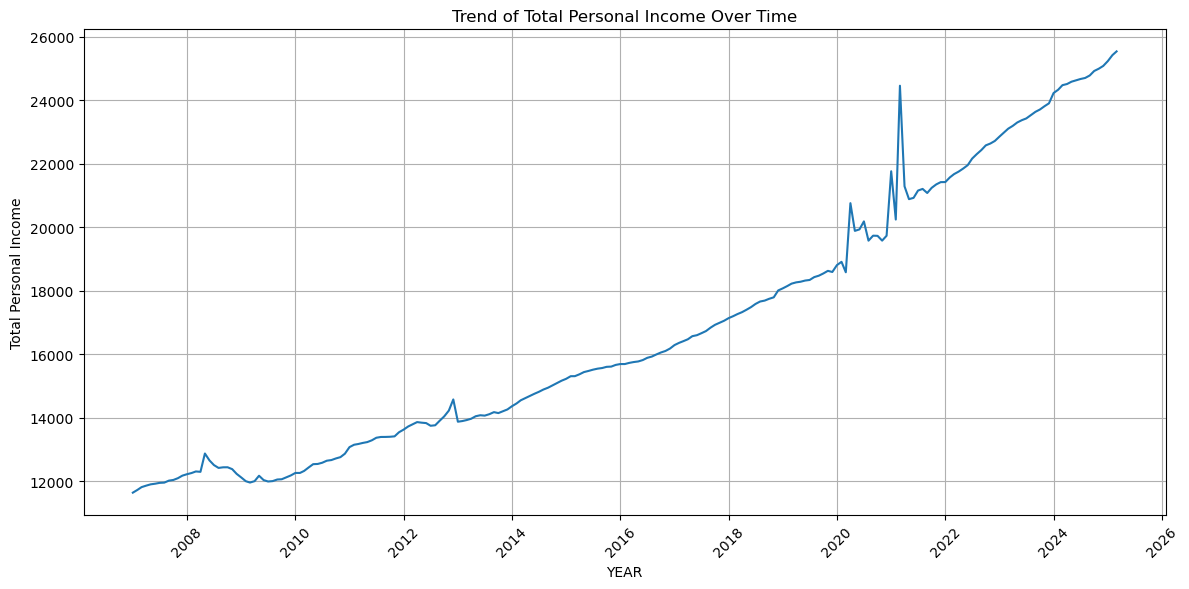

In [23]:
# Line Plot of Personal Income Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=us_econ,x="DATE", y="Total_Personal_Income", errorbar=None)
plt.title("Trend of Total Personal Income Over Time")
plt.xlabel("YEAR")
plt.ylabel("Total Personal Income")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()


**Observations and Insights:**
- According to the Line Plot shows Steady Growth from 2008–2019:
  - The U.S. experienced consistent growth in total personal income for over a decade.
  - This reflects strong employment, rising wages, and overall economic health pre-pandemic.
- There are noticable Sharp Spikes 2020–2021:
  - Noticeable income volatility during the COVID-19 pandemic.
  - Likely caused by government stimulus checks, unemployment benefits, and business relief.
  - The spikes are not consitent, they seem to be a reflection of temporary 'cash flow' due to stimulus support.
- There seem to be a Post-Pandemic Stability and Growth from 2022–2025:
  - After a dip, income levels recover and continue climbing.
  - Indicates that personal income remains strong, which could reflect wage increases, job recovery, or cost-of-living adjustments.
  
**Recommendations for Moving/Job:**
- Consider sectors tied to tech, healthcare, or green energy—these often correlate with income growth.
- Income growth ≠ savings growth. As income increases, so does temptation to spend.
- Plan for long-term financial stability: automate savings, invest surplus income, and avoid lifestyle inflation.
- Short-term travelers might encounter higher prices in areas with sharp income growth (restaurants, events, services).
- Plan budgets accordingly—especially for post-2020 destinations with significant economic spikes.



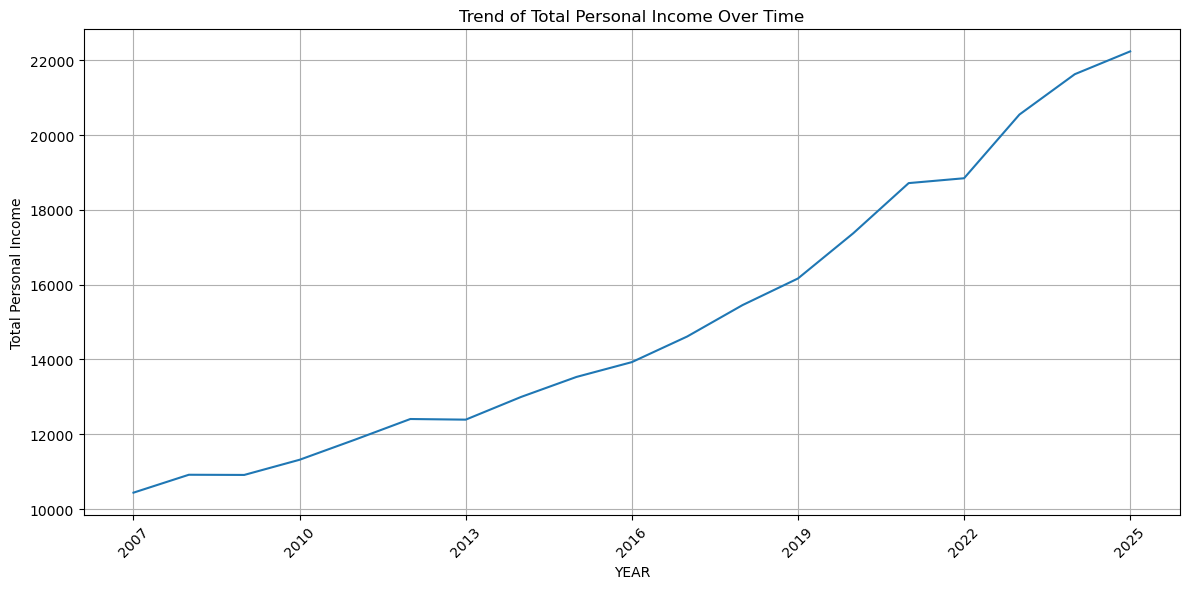

In [24]:
# Line Plot of Personal Disposable Income Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=us_econ,x="YEAR", y="Disposable_Personal_Income_Nominal", errorbar=None)
plt.title("Trend of Total Personal Income Over Time")
plt.xlabel("YEAR")
plt.ylabel("Total Personal Income")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(3))
plt.grid()
plt.tight_layout()


**Oberations and Insights:**
- The total personal income has been steadily increasing from around $10,500 in 2007 to over $22,000 in 2025.
- The growth is largely uninterrupted, with only very minor plateaus 2012–2013, 2021–2022.
- This implies long-term economic resilience and wage growth, even through external shocks.

**Recommendations for Moving/Job:**
- Strong income growth means more job market stability and potential upward mobility.
- Consider moving to areas with:
- Rising personal income.
- Favorable cost-of-living ratios.
  - Access to income drivers (e.g., growing sectors like tech, finance, or healthcare).
 - Rising personal income might mean higher local spending, so maybe expect:
  - Elevated prices in housing, dining, services.
- If you're planning for your kids or retirement, this trend supports:
  - Potential for income-linked products (e.g., real estate, annuities).

**Key Takeaway:**
In a time where many economies wavered under econimic conditions and uncertainties, personal income in the U.S. doubled in less than 20 years.

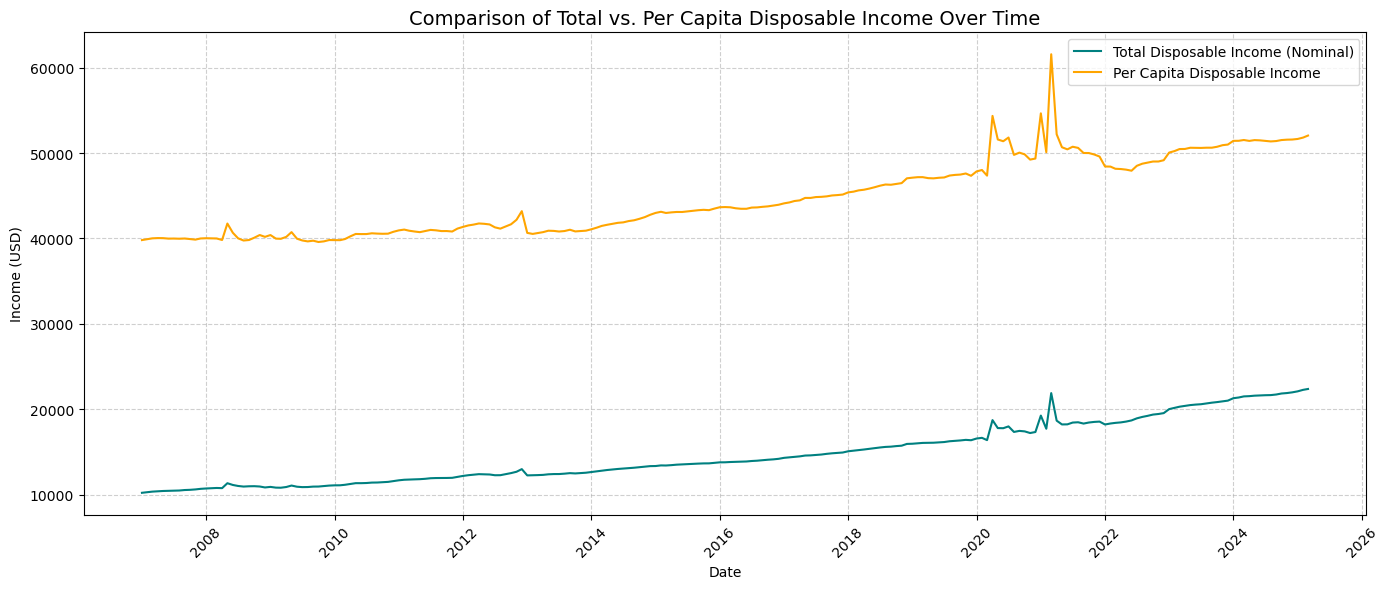

In [35]:
# Plot both series on the same chart
plt.figure(figsize=(14, 6))
plt.plot(us_econ['DATE'], us_econ['Disposable_Personal_Income_Nominal'], label='Total Disposable Income (Nominal)', color='teal')
plt.plot(us_econ['DATE'], us_econ['Disposable_Personal_Income_Per_Capita'], label='Per Capita Disposable Income', color='orange')

# Chart customization
plt.title('Comparison of Total vs. Per Capita Disposable Income Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Income (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations & Insights:**
- The Two Line Plots shows Parallel Upward Trends:
  - Both total and per capita disposable income show long-term growth.
  - Indicates a growing economy with rising income both collectively and individually.
  - We can see what looks like a Steeper Rise in Total Income
- The teal line--total income--climbs more steeply, suggesting:
  - Population growth
  - Or higher earners inflating aggregate income
- There seem to be Volatility Around 2020–2022
  - Spikes and dips, particularly in per capita income reflect:
    - Pandemic-era stimulus payments
    - Short-term disruptions in consumption, employment, and benefits
    - Quick rebounds show resilience in household income post-pandemic.
- The Gap seems be getting wider:
  - The consistent gap between the two lines suggests that while total income is rising fast, average per-person gains are slower.
  - Could signal income inequality, or simply the effect of population growth diluting per capita figures.

**Recommendations for Moving/Job:**
- There are Strong income growth benefits:
  - For Households, career growth, ect... 
  - Look for regions where per capita trends are on par with total growth.
  




In [ ]:
us_econ['Liquidity_Index_Pct'] = (1 - (us_econ['Real_Personal_Consumption_Expenditures'] / us_econ['Disposable_Personal_Income_Per_Capita'])) * 100


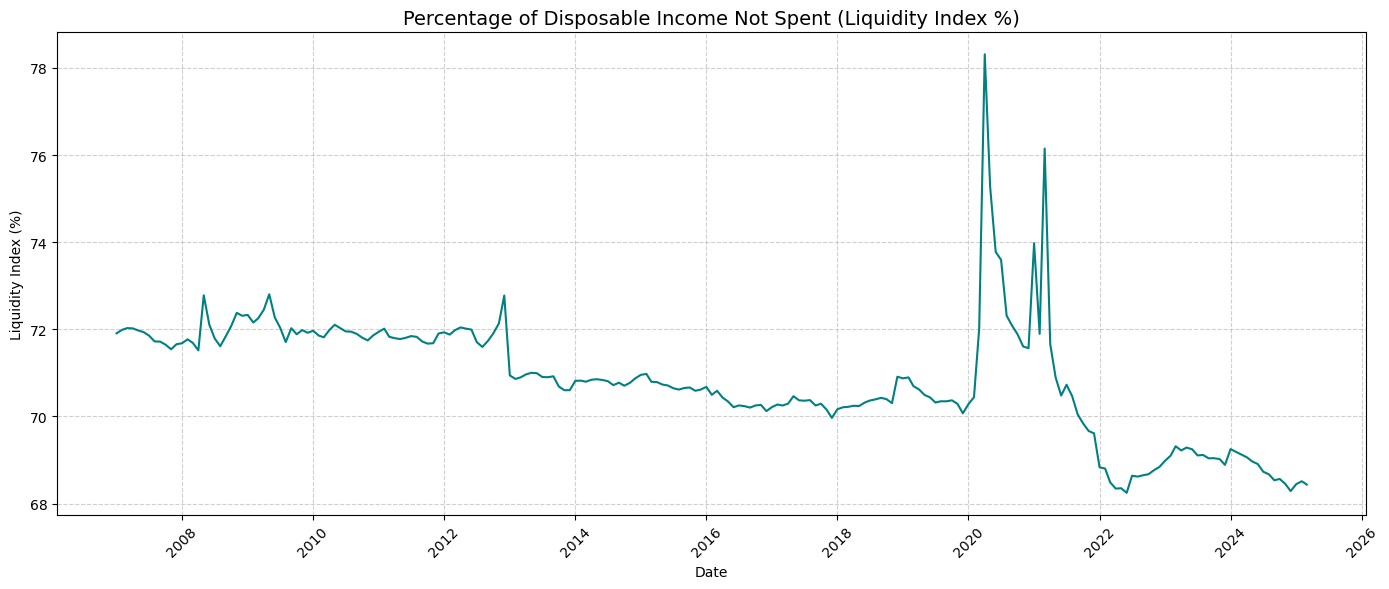

In [33]:
# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=us_econ, x='DATE', y='Liquidity_Index_Pct', color='teal')
plt.title('Percentage of Disposable Income Not Spent (Liquidity Index %)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Liquidity Index (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Observations & Insights:**
- The Liquidity Index hovers mostly between 70–73% Pre-2020--2006–2019:
  - This suggests that on average, more than 70% of disposable income was not spent, indicating a high level of savings, investment, or debt servicing...
  - The trend appears relatively stable with slight gradual decline.
-  Ther is a Spike between 2020–2021:
  - There’s a massive and sharp spike peaking above 78%, followed by a sharp drop and volatility.
- This is most likely linked to COVID-19 economic disruptions:
  - Stimulus checks and reduced spending opportunities (lockdowns).
  - People saved more or delayed large expenditures.
  - A sudden surge in leftover disposable income.
- There is another decline after 2021:
  - After the peak, the liquidity index declines sharply, even dropping below 70%, and continues downward.
- This indicates that:
  - People started spending more of their income post-pandemic.
  - There may be inflationary pressures or economic stress reducing discretionary savings.
  - Could signal reduced financial buffers for households.

**Key Takeaway:** 
Americans had relatively high liquidity for over a decade, but pandemic-related events created a brief, historic surplus in unspent income—followed by a significant decline in liquidity that may pint to tightening personal finances.

**Note:**
- Graph shows the percentage of income not spent:
- If the result is 25%, then on average, 25% of disposable income was not spent (i.e., potentially saved or held as liquidity).
- If the result is 0%, it means people are spending all their disposable income.
- If it’s negative, spending exceeds disposable income, which can signal overspending, etc...

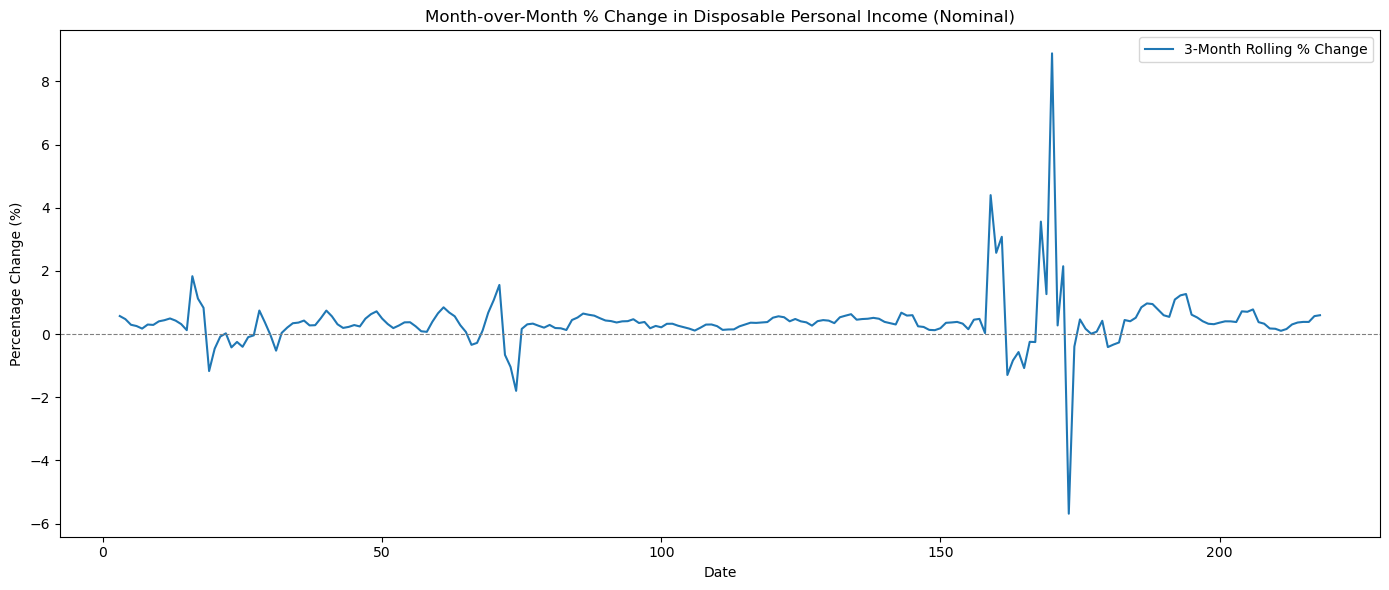

In [108]:
# Percentage change month-over-month
us_econ['Income_Pct_Change'] = us_econ['Disposable_Personal_Income_Nominal'].pct_change() * 100

# Rolling average for smoother visualization
us_econ['Smoothed_Pct_Change'] = us_econ['Income_Pct_Change'].rolling(window=3).mean()

# Line Plot of % change 
plt.figure(figsize=(14, 6))
sns.lineplot(data=us_econ, x=us_econ.index, y='Smoothed_Pct_Change', label='3-Month Rolling % Change')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Labeling
plt.title('Month-over-Month % Change in Disposable Personal Income (Nominal)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.tight_layout()
plt.show()

- Negative spikes = periods of sharp income increases (e.g., stimulus checks, wage hikes).

- Negative dips = drops in income (e.g., job losses, inflationary drag).



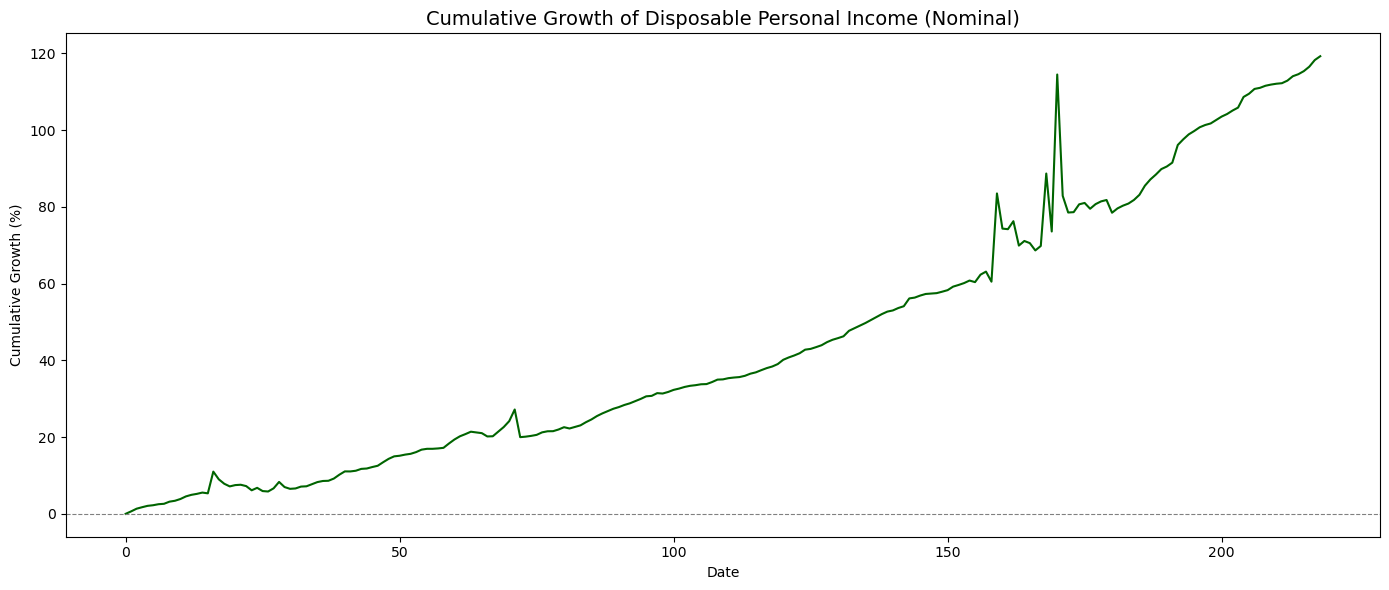

In [40]:

# Cumulative growth since the first available date
initial_value = us_econ['Disposable_Personal_Income_Nominal'].iloc[0]
us_econ['Cumulative_Growth_%'] = ((us_econ['Disposable_Personal_Income_Nominal'] - initial_value) / initial_value) * 100

# Plot lineplot over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=us_econ, x=us_econ.index, y='Cumulative_Growth_%', color='darkgreen')

# Labels and styling
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Cumulative Growth of Disposable Personal Income (Nominal)', fontsize=14)
plt.ylabel('Cumulative Growth (%)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

**Line Plot Shows:** 

- A steadily rising line means sustained income growth over time.
- Sharp jumps may reflect stimulus events or recovery periods.
- A flattening line may signal stagnation or economic pressure.
  - Visitors or immigrants can use this information to help make finanicial decisions about earning potential in the U.S.

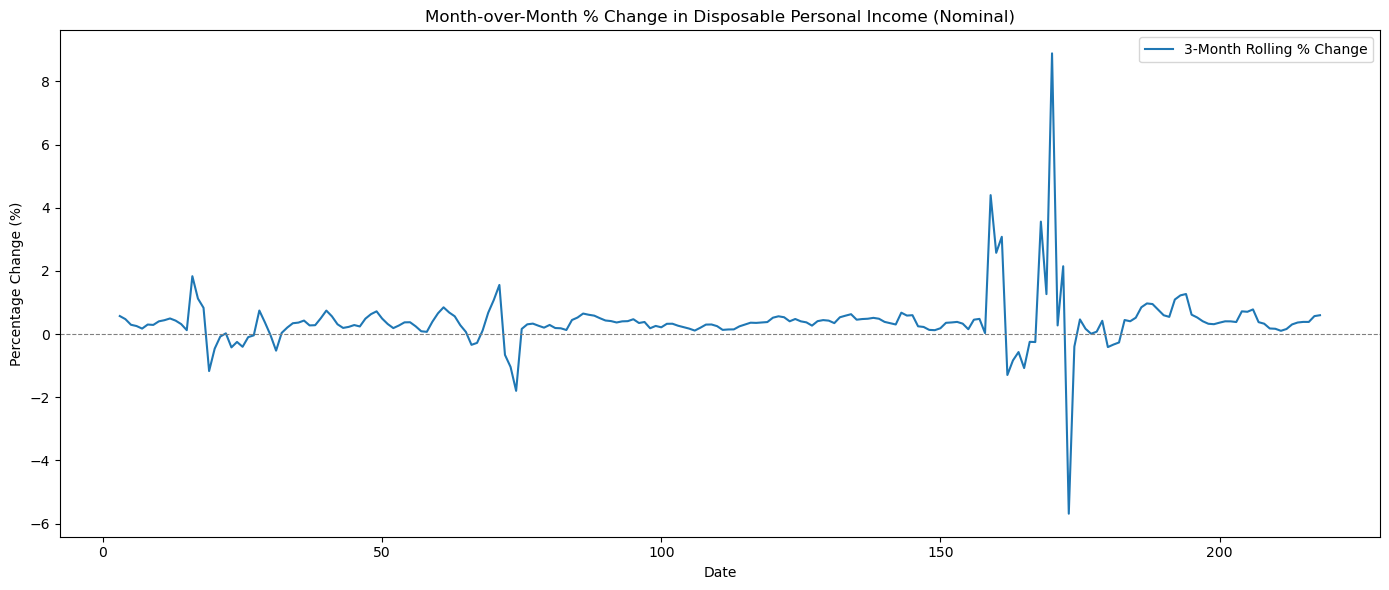

In [39]:
# Percentage change month-over-month
us_econ['Income_Pct_Change'] = us_econ['Disposable_Personal_Income_Nominal'].pct_change() * 100

# Rolling average for smoother visualization
us_econ['Smoothed_Pct_Change'] = us_econ['Income_Pct_Change'].rolling(window=3).mean()

# Line Plot of % change 
plt.figure(figsize=(14, 6))
sns.lineplot(data=us_econ, x=us_econ.index, y='Smoothed_Pct_Change', label='3-Month Rolling % Change')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Labeling
plt.title('Month-over-Month % Change in Disposable Personal Income (Nominal)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.tight_layout()
plt.show()

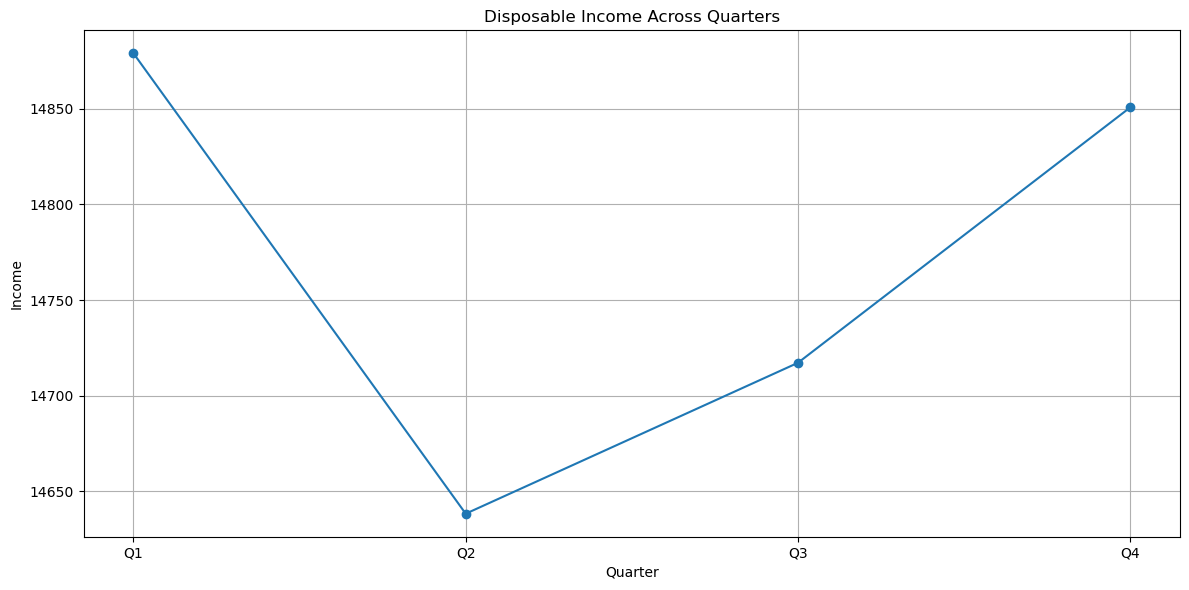

In [47]:
# Split-combine-aggregate: Group and calculate average Disposable Income by Quarter
quarterly_income = us_econ.groupby('QUARTER')['Disposable_Personal_Income_Nominal'].mean().reset_index()

# lIne plot of of quarterly income 
plt.figure(figsize=(12,6))
plt.plot(quarterly_income['QUARTER'], quarterly_income['Disposable_Personal_Income_Nominal'], marker='o')
plt.title("Disposable Income Across Quarters")
plt.ylabel("Income")
plt.xlabel("Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()


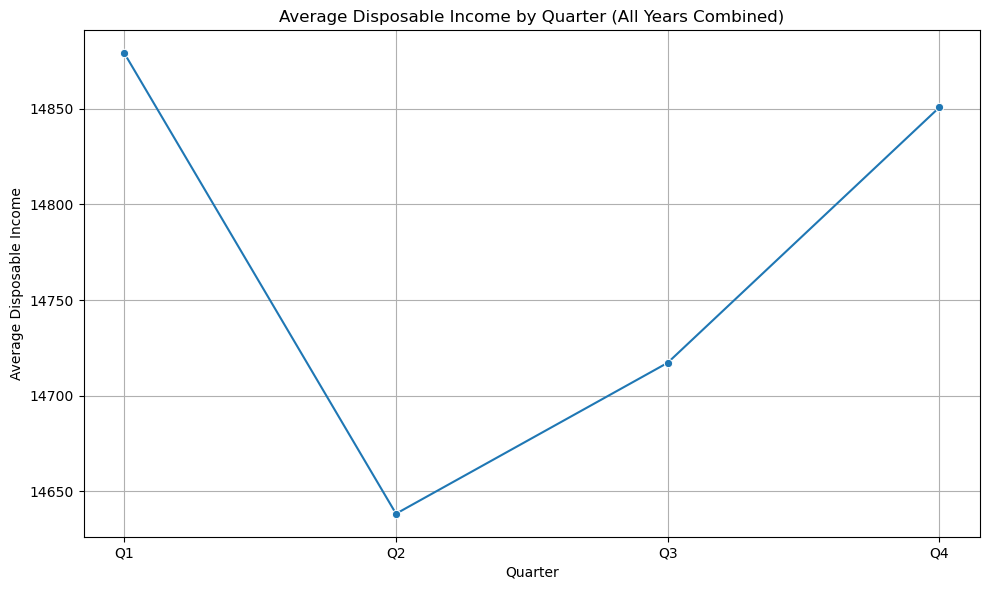

  QUARTER  Disposable_Personal_Income_Nominal  QoQ_Change_Pct
0      Q1                        14878.980702             NaN
1      Q2                        14638.253704       -1.617900
2      Q3                        14717.159259        0.539037
3      Q4                        14850.683333        0.907268


In [73]:
# Group by QUARTER and calculate mean Disposable Income
quarterly_income = us_econ.groupby('QUARTER')['Disposable_Personal_Income_Nominal'].mean().reset_index()

# Calculate Quarter-over-Quarter % change
quarterly_income['QoQ_Change_Pct'] = quarterly_income['Disposable_Personal_Income_Nominal'].pct_change() * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_income, x='QUARTER', y='Disposable_Personal_Income_Nominal', marker='o')
plt.title('Average Disposable Income by Quarter (All Years Combined)')
plt.xlabel('Quarter')
plt.ylabel('Average Disposable Income')
plt.grid(True)
plt.tight_layout()
plt.show()

# Preview the results
print(quarterly_income)


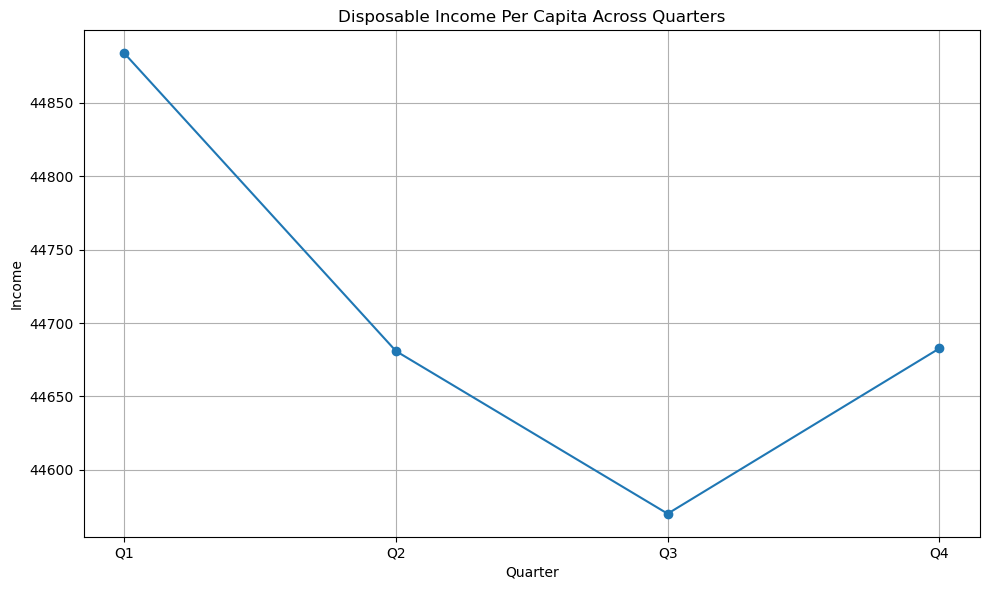

In [72]:
# Split-combine-aggregate: Group and calculate average Disposable Income by Quarter
quarterly_income = us_econ.groupby('QUARTER')['Disposable_Personal_Income_Per_Capita'].mean().reset_index()


# lIne plot of of quarterly income 
plt.figure(figsize=(10,6))
plt.plot(quarterly_income['QUARTER'], quarterly_income['Disposable_Personal_Income_Per_Capita'], marker='o')
plt.title("Disposable Income Per Capita Across Quarters")
plt.ylabel("Income")
plt.xlabel("Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()

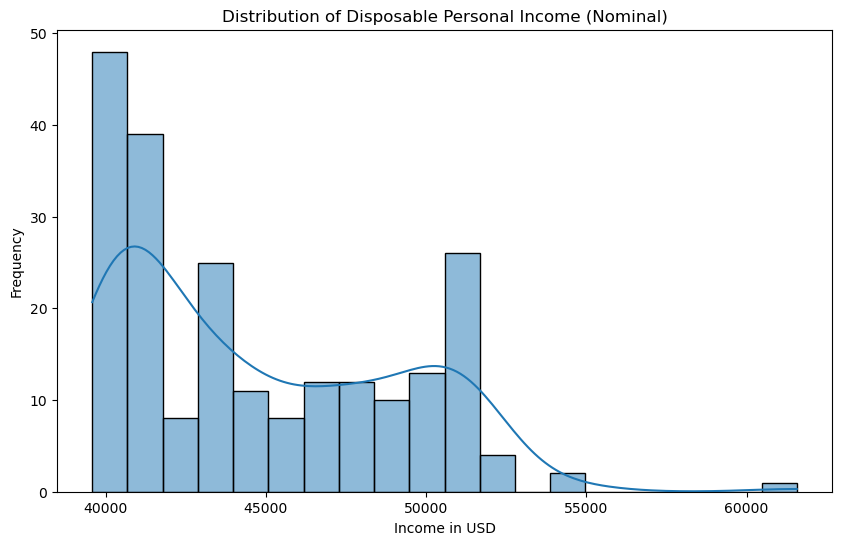

In [70]:
# Distribution of Disposable Personal Income (Nominal) Chart: Histogram or KDE Plot
plt.figure(figsize=(10,6))
sns.histplot(data=us_econ["Disposable_Personal_Income_Per_Capita"], kde=True, bins=20)
plt.title("Distribution of Disposable Personal Income (Nominal)")
plt.xlabel("Income in USD")
plt.ylabel("Frequency")
plt.show()


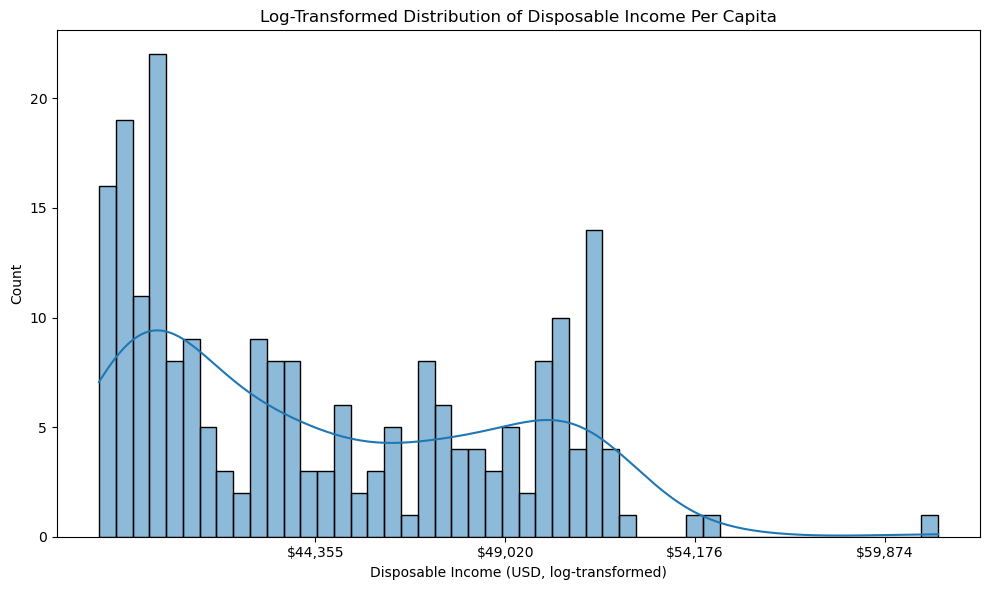

In [85]:
# Tick labels show actual income using Log-Transforms.
plt.figure(figsize=(10,6))
ax = sns.histplot(np.log(us_econ["Disposable_Personal_Income_Per_Capita"]), kde=True, bins=50)
ax.set_xticks([10.7, 10.8, 10.9, 11.0])
ax.set_xticklabels([f"${int(np.exp(tick)):,}" for tick in ax.get_xticks()])
ax.set_xlabel("Disposable Income (USD, log-transformed)")
plt.title("Log-Transformed Distribution of Disposable Income Per Capita")
plt.tight_layout()
plt.show()


**Observations & Insights:**
- This log-transformed distribution of per-person disposable income shows that most Americans fall within the $40,000–$50,000 range. 
- A majority of entries cluster around the lower income tiers, with a noticeable tapering in higher brackets. 
- This confirms the right-skewed tendency of U.S. income, where fewer individuals reach the top/highest levels of disposable earnings.

**Recommendations for Moving/Job**
- If one is moving to or analyzing the U.S. economy for employment or affordability purpose(s), this chart helps set realistic manage income expectations.
- While average disposable income per person might look high on paper, the actual distribution is mostly concentrated within the lower-to-mid income ranges.

**Note:**
- Log scaling helped normalize extreme outliers revealed in the prior Histogram, subsequently revealing subtle density patterns that would have beeen masked/missed.
- Removed the lowest tick (10.5 ≈ $35,000) to prevent misleading scaling.
- Replaced tick/log labels with real dollar values. 
- Used KDE overlay — helps highlight the density trend: fewer people earn higher disposable incomes.


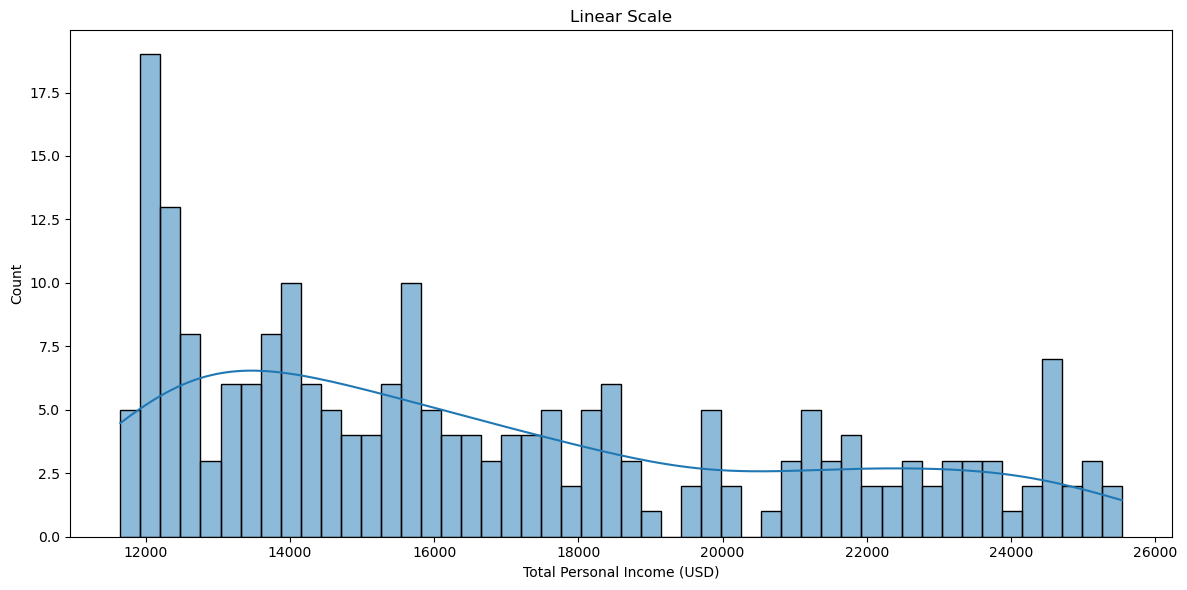

In [84]:
#
plt.figure(figsize=(12, 6))
sns.histplot(us_econ["Total_Personal_Income"], kde=True, bins=50)
plt.title("Linear Scale")
plt.xlabel("Total Personal Income (USD)")

plt.tight_layout()
plt.show()


**Observations and Insights:**
- The Histogram Plot of Total Income clearly shows Right-Skewed Distribution:
  - The majority of individuals have total personal income clustered around the $12,000–$15,000 range. 
  - As income increases beyond that, the frequency noticeably declines — an example of a positively skewed distribution.
- There are Income Cliffs Beyond $20,000:
  - There's a visible drop-off in the number of people earning above $20,000–$25,000, reinforcing the general concensus that high-income earners are fewer and less common.
- The KDE Curve Behavior:
  - The KDE (Kernel Density Estimate) overlay supports this pattern, peaking early and gently tapering off 
  - It Visually shows how rare higher incomes are within this dataset.
- Possible Income Segmentation/Groupings:
  - The plot suggests subtle clustering patterns within income bands--micro plateaus, hinting at potential socioeconomic tiers or policy-linked income caps (e.g., benefit thresholds, wage banding).

**Recommendations for Moving/Job:**
- Understand Median vs. Mean:
  - Don’t be swayed by "average income" headlines.
  - Most people are earning less than what the average implies due to this right skew. 
  - Focus on the median when researching roles and offers.
- Identify High-Income Industries:
  - To break into the upper-income brackets, target fields that reward specialization and skills:
    - Tech & software development
    - Finance & data analytics
    - Healthcare (e.g., nursing, medical technicians, specialized therapy)
    - Skilled trades (e.g., electricians, HVAC, union roles)
- Budget for Transition:
  - If you're moving to the U.S., this plot indicates that high income is not guaranteed, so set expectations accordingly. 
  - Start with an income cushion, and factor in local cost-of-living indexes.
- Target High-Earning Regions:
  - Income distribution varies by state. Focus job searches on regions with both:
  - Higher average wages
  - Reasonable cost of living (e.g., Midwest tech cities, Southern metros)
- Upskill With Intent:
  - Since most earners fall in lower income bands:
    - certifications
    - degree programs, or 
    - vocational training can offer clear paths out of the lower tiers.

**Key Takeaway:**
- The KDE seems to confirms a concentrated income band for most Americans, with limited representation at higher levels. For those moving or job-seeking, planning realistically, targeting in-demand skills, and aligning with geographic trends is key to upward mobility.

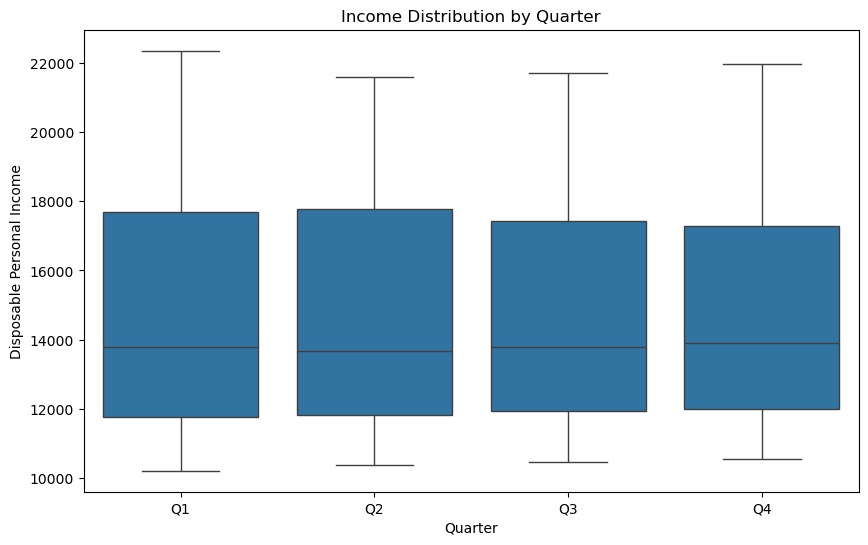

In [55]:
#Box Plot by Quarter (Seasonal View)
plt.figure(figsize=(10,6))
sns.boxplot(data=us_econ, x='QUARTER', y='Disposable_Personal_Income_Nominal')
plt.title("Income Distribution by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Disposable Personal Income")
plt.show()


**Observations and Insights:**
- The median disposable income remains fairly stable across Q1 to Q4, with only slight fluctuations.
- Q2 shows a dip, which could reflect tax-related deductions, mid-year expenses, or fewer bonuses.
- Income rebounds in Q3 and Q4, possibly tied to seasonal hiring, end-of-year bonuses, or fiscal planning cycles.
- The overall range is tight, reinforcing the notion that most earners experience limited quarter-to-quarter income volatility.
- This trend may indicate that structural income (wages/salaries) outweighs seasonal incentives or variable payouts in the broader dataset.

**Recommendations for Moving/Job:**
- Stability is a strength: 
  - Those seeking consistent income flow throughout the year (e.g., for budgeting, remittances, or savings goals) may find the U.S. job market favorable.
- Plan around Q2: 
  - The Q2 dip, although modest, may affect new movers or job entrants expecting higher take-home income — budget conservatively during this period.
- Opportunities peak in Q4: 
  - If considering a move, Q4 may be optimal, with higher disposable income suggesting greater hiring activity, consumer spending, and end-of-year bonuses.
- Use stable quarters to save: 
  - Since income is relatively stable, financial planning tools like automatic savings or investing apps can help maximize long-term gains without seasonal stress.




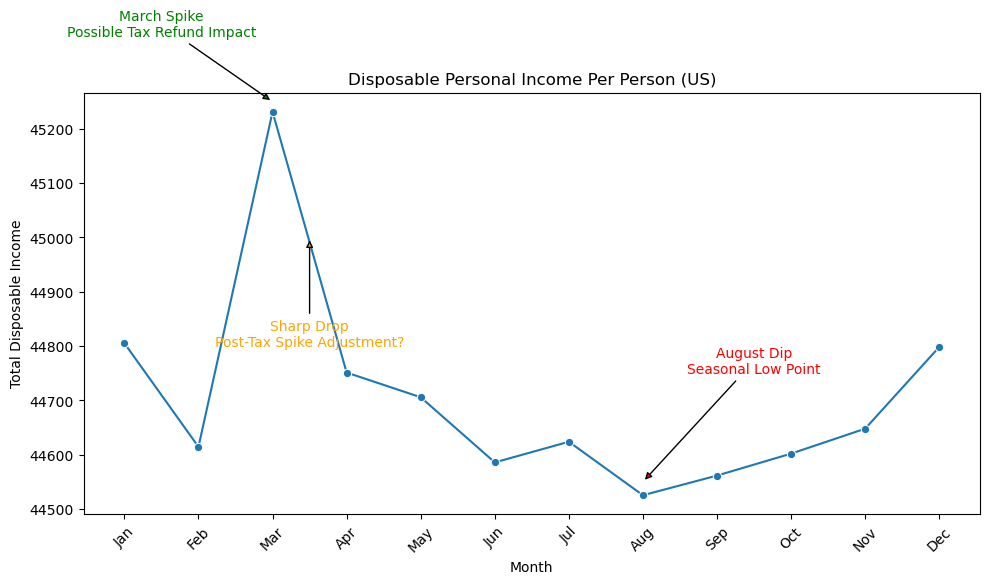

In [67]:
# Line Plot of Disposable Personal Income Per Person
# Ordered categorical type 
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
us_econ['MONTH_NAME'] = pd.Categorical(us_econ['MONTH_NAME'], categories=months_order, ordered=True)

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=us_econ, x='MONTH_NAME', y='Disposable_Personal_Income_Per_Capita', marker='o', errorbar=None)
plt.title("Disposable Personal Income Per Person (US)")
plt.xlabel("Month")
plt.ylabel("Total Disposable Income")

# Annotate March using numeric index for month positions
plt.annotate(
    'March Spike\nPossible Tax Refund Impact',
    xy=(2, 45250),         # x=2 (March), y= actual value of spike
    xytext=(0.5, 45370),   # Shifted left up
    arrowprops=dict(facecolor='green', arrowstyle='-|>'),
    fontsize=10,
    color='green',
    ha='center'
)

# Annotate the drop from March to April
plt.annotate(
    'Sharp Drop\nPost-Tax Spike Adjustment?',
    xy=(2.5, 45000),           # Midpoint between March-2 and April-3
    xytext=(2.5, 44800),       # Text below the point
    arrowprops=dict(facecolor='orange', arrowstyle='-|>'),
    fontsize=10,
    color='orange',
    ha='center'
)

# Annotate August
plt.annotate(
    'August Dip\nSeasonal Low Point',
    xy=(7, 44550),
    xytext=(8.5, 44750),
    arrowprops=dict(facecolor='red', arrowstyle='-|>'),
    fontsize=10,
    color='red',
    ha='center'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations and Insights:**
- There is a noticeable peak in March, suggesting either:
  - Annual bonuses
  - Tax refunds beginning to arrive
  - Or a seasonal economic policy effect (e.g., stimulus, fiscal payouts in past years)

- Disposable income appears to decline steadily from April through August, bottoming out in August.
  - Could indicate higher expenditures during vacation season (spending increases, saving dips).
  - Employers may offer fewer bonuses during mid-year.
  - Climb back in fall/winter: A gradual increase is seen from September to December.
  - May reflect end-of-year bonuses, improved consumer behavior heading into the holiday season, or catch-up income adjustments.

- Possibly to Policy Makers:
  - Consider strengthening social safety nets during summer months, when real income appears to be at its lowest.
  - Evaluate tax return timing and its impact on early-year income surges.

- Employers/HR Professionals:
  - Income volatility might affect morale — staggered bonuses or mid-year incentives could stabilize spending confidence.

**Recommendations for Moving/Job**
  - March and December may be more favorable financially due to high disposable income.
  - If budgeting for a move to the U.S., expect less buffer room in summer months.
  For Job Seekers or Migrants:

**NOTE:** This seasonal pattern could be compared with monthly consumer sentiment or retail sales data to cross-check behavioral trends.
Suggests that real income modeling should not assume monthly uniformity.

## **Economic Health Bivariate Analysis**

Questions:

- Split-Combine-Aggregate:
  - can try looking at income with regard to political party or administration using year, month, season, etc., using scatter plot.
  - Seasons can also be look at in bivariate analysis to see the relation of income and seasonality..  
  - groupby or cut fiscal Quarters to get deeper insights into income and or liquidity trends overtime, etc...
  - groupby months to get a micro-income perspective over time, etc...
   

In [ ]:
# US Economy EDA:
us_econ.head() 

,DATE,YEAR,MONTH,MONTH_NAME,QUARTER,Disposable_Personal_Income_Nominal,Disposable_Personal_Income_Per_Capita,Real_Personal_Consumption_Expenditures,Total_Personal_Income
0,2007-01-01,2007,1,Jan,Q1,10200.4,39803,11181.0,11647.1
1,2007-02-01,2007,2,Feb,Q1,10265.8,39906,11178.2,11734.2
2,2007-03-01,2007,3,Mar,Q1,10337.0,40007,11190.7,11821.4
3,2007-04-01,2007,4,Apr,Q2,10376.5,40037,11201.5,11868.1
4,2007-05-01,2007,5,May,Q2,10412.7,40029,11218.0,11908.7


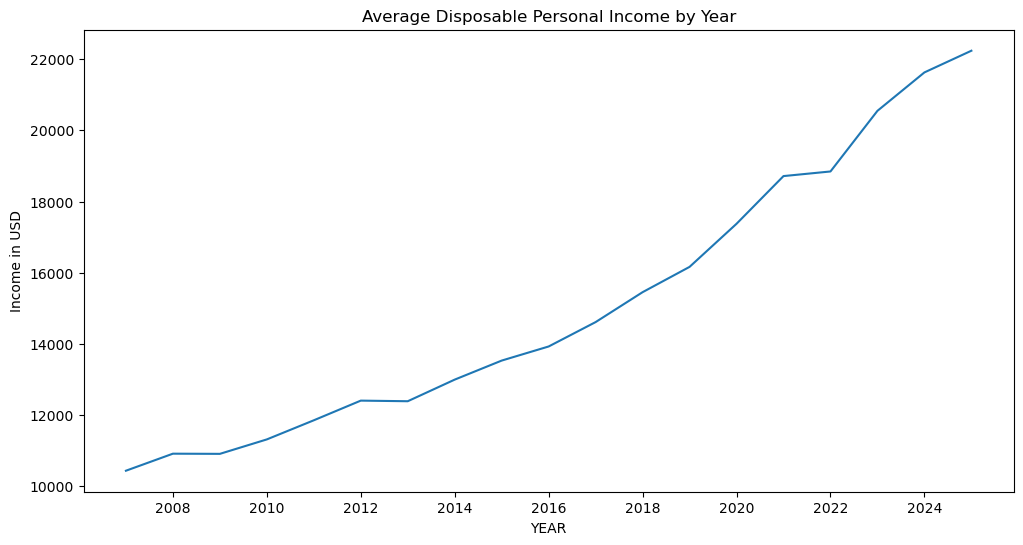

In [44]:
#Income vs. Yearly Trend (Highlighting Growth) Chart: Line Plot with YEAR as x-axis, grouped or averaged
plt.figure(figsize=(12, 6))
income_by_year = us_econ.groupby('YEAR')['Disposable_Personal_Income_Nominal'].mean().reset_index()
sns.lineplot(data=income_by_year, x='YEAR', y='Disposable_Personal_Income_Nominal')
plt.title("Average Disposable Personal Income by Year")
plt.gca().xaxis.set_major_locator(xticks.MultipleLocator(2))
plt.ylabel("Income in USD")
plt.show()


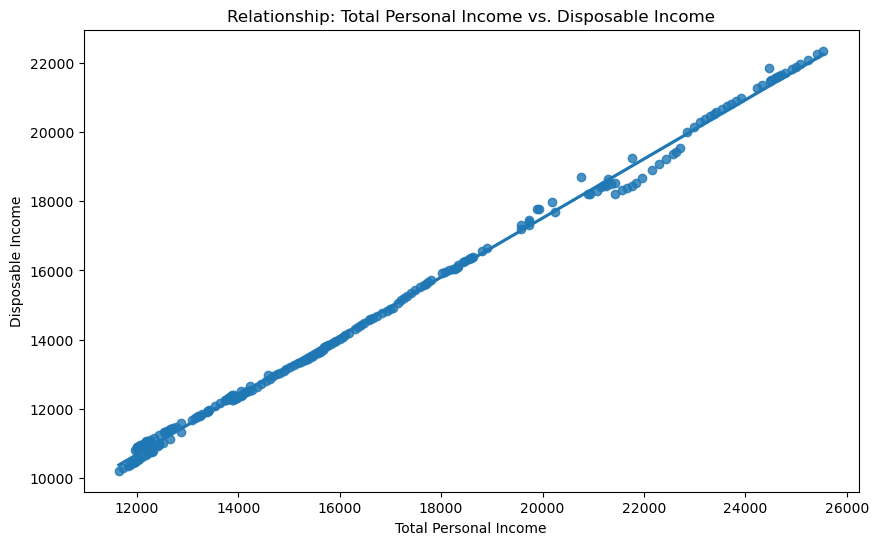

In [64]:
# Personal Income vs Disposable Income 
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(data=us_econ, x='Total_Personal_Income', y='Disposable_Personal_Income_Nominal')
plt.title("Relationship: Total Personal Income vs. Disposable Income")
plt.xlabel("Total Personal Income")
plt.ylabel("Disposable Income")
plt.show()


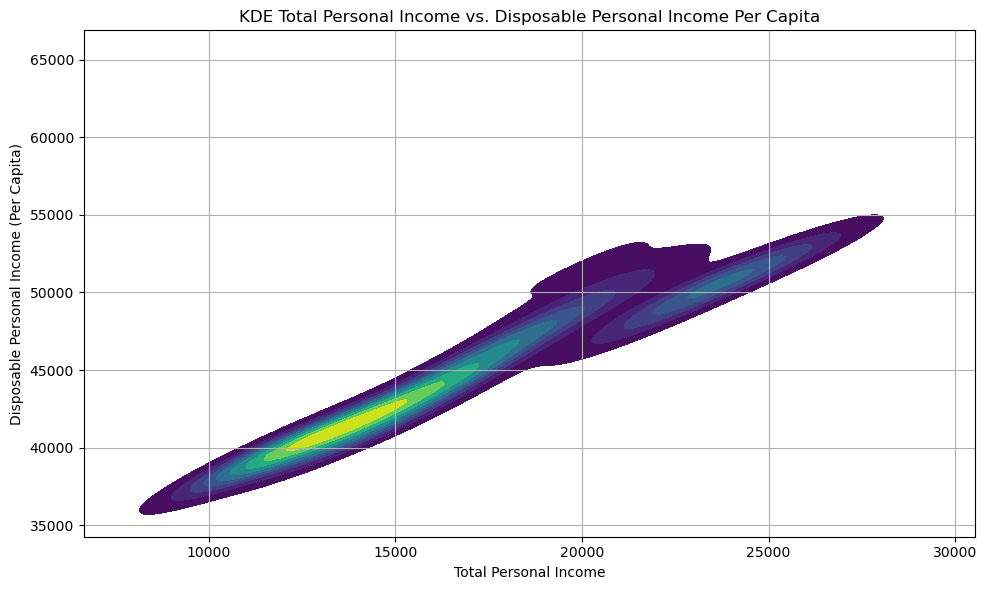

In [63]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=us_econ, x='Total_Personal_Income', y='Disposable_Personal_Income_Per_Capita', fill=True, cmap='viridis')
plt.title("KDE Total Personal Income vs. Disposable Personal Income Per Capita")
plt.xlabel("Total Personal Income")
plt.ylabel("Disposable Personal Income (Per Capita)")
plt.grid(True)
plt.tight_layout()
plt.show()



**Observations and  Insights:**
- The KDE plot shows clear positive correlation:
  - As total personal income rises, disposable personal income per capita rises as well.
  - The tight diagonal band--particularly the dense yellow-green line--indicates a strong and consistent income structure:
    - meaning as economies grow, individuals are consistently seeing more take-home pay.
- Tapering at Higher Income:
- The plot slightly widens and gets less dense in the upper-right region.
- This suggests that gains in disposable income per person slow down even as total income grows--likely due to:
  - Tax brackets
  - Inequality of distribution
  - Population growth effects diluting per capita gains.
  - Compact Cluster at the Mid-Range
- Most data is concentrated approximately between:
  - Total Income: 12,000–20,000
  - Disposable Per Capita: 40,000–48,000
  - These values likely reflect the bulk of the population and standard economic periods.

**Recommendations for Moving/Job**
- Target regions/areas or timeframes where both total and per-person income rise together — indicates both macro and micro financial health.
- Be aware that high total income ≠ high per-person income — some areas may be booming, but the average worker might not feel it due to population or cost factors.
- Check both salary potential and take-home value. A place with high overall income but modest per capita disposable income might mean:
  - Greater competition
  - Higher taxes or living costs
  - Aim for environments where income growth translates into real purchasing power.

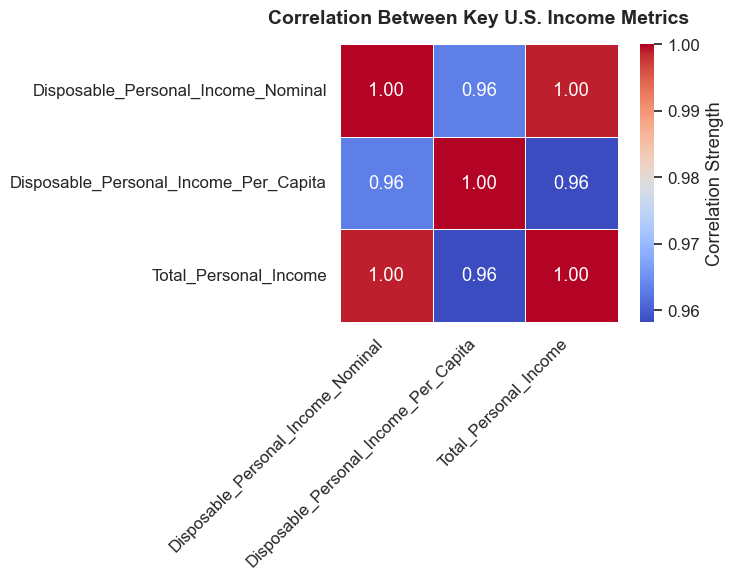

In [ ]:
# Correlation Heatmap (Quick Overview)
# Heatmap of numerical variables

# Select and compute correlation
cols = ['Disposable_Personal_Income_Nominal', 
        'Disposable_Personal_Income_Per_Capita', 
        'Total_Personal_Income']

correlation_matrix = us_econ[cols].corr()

# Set the figure
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)

# Heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor='white', 
            square=True, 
            cbar_kws={'label': 'Correlation Strength'})

# Title and layout
plt.title("Correlation Between Key U.S. Income Metrics", fontsize=14, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



**Observations and Insights:**
- The HeatMap shows all three metrics — Nominal Disposable Personal Income, Disposable Personal Income Per Capita, and Total Personal Income — are very highly correlated--0.96–1.00.
- This indicates they track each other closely over time — which is expected, since they’re all components of the income landscape.
- Nominal DPI includes everyone.
- Total Personal Income includes a broader base (wages, transfers, dividends, etc.), so a high correlation is makes sense.



**Note:**
- The heatmap confirms that there’s internal consistency in the dataset.



<Figure size 1200x600 with 0 Axes>

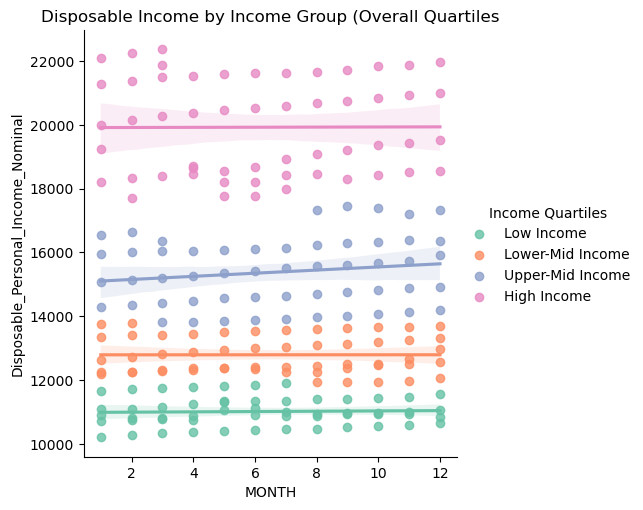

In [ ]:
""" 
Income Quartiles naming scheme for income tiers:

Quartile	    Label 	  	
1st quartile	Low Income		
2nd quartile	Lower-Mid Income	
3rd quartile	Upper-Mid Income	
4th quartile	High Income 

""" 

# Create based quartiles or seasonal groupings
us_econ.loc[:,'Income Quartiles'] = pd.qcut(us_econ['Disposable_Personal_Income_Nominal'], q=4, labels = ['Low Income', 'Lower-Mid Income', 'Upper-Mid Income', 'High Income']
)

#Scatter with hue
sns.lmplot(data=us_econ, x='MONTH', y='Disposable_Personal_Income_Nominal', hue='Income Quartiles', palette='Set2')
plt.title("Disposable Income by Income Group (Overall Quartiles")
plt.show()


**Disposable Personal Income Nominal Per Season:**

**Observation:**
- Fall Q3: Jul–Sep: and Summer Q2: Apr–Jun consistently have higher income values.
- Winter Q1: Jan–Mar: and Spring Q4: Oct–Dec show lower nominal income, though trends are relatively close.

**Insight:**
- Fall and Summer quarters may reflect seasonal income boosts — possibly due to:
- Bonuses, seasonal employment
- Agricultural cycles
- Government disbursements
- If planning a move or evaluating job income, these seasonal variations matter, especially in budgeting or negotiating salary.

**Recommendations for Moving/Job**
- Income is Rising: Especially from 2022 onward — a healthy sign for future earnings.
- Seasonal Swings does exist however: Higher nominal earnings in summer/fall may impact optimal job start times or moving periods.
- COVID Effects Are Visible: But were followed by consistent rebounds, indicating recovery capacity.

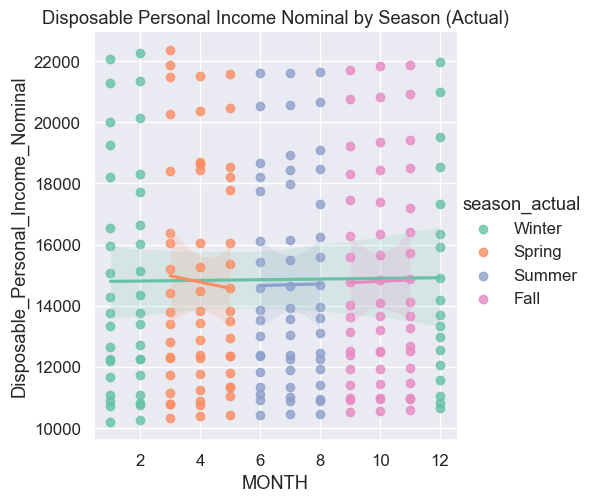

In [ ]:
# creating explicit months of fixed ranges and plotting of disposable personal income by season. 
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

us_econ['season_actual'] = us_econ['MONTH'].apply(assign_season)

sns.lmplot(data=us_econ, x='MONTH', y='Disposable_Personal_Income_Nominal', hue='season_actual', palette='Set2')
plt.title('Disposable Personal Income Nominal by Season (Actual)')
plt.show()


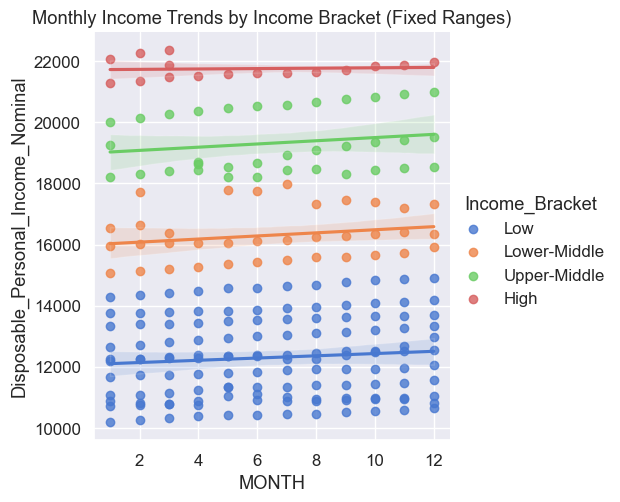

In [ ]:
# Define fixed income ranges
bins = [10000, 15000, 18000, 21000, 24000]
labels = ['Low', 'Lower-Middle', 'Upper-Middle', 'High']

us_econ['Income_Bracket'] = pd.cut(
    us_econ['Disposable_Personal_Income_Nominal'], 
    bins=bins, 
    labels=labels
)

# Plot
sns.lmplot(
    data=us_econ, 
    x='MONTH', 
    y='Disposable_Personal_Income_Nominal', 
    hue='Income_Bracket', 
    palette='muted'
)
plt.title("Monthly Income Trends by Income Bracket (Fixed Ranges)")
plt.show()


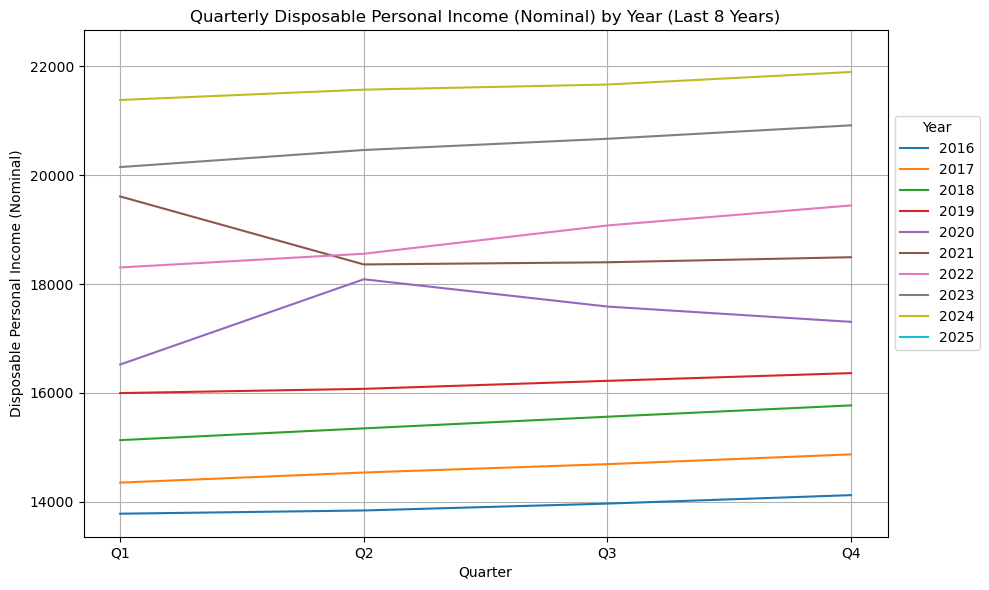

In [65]:
# create and filter dataframe
recent_years = sorted(us_econ['YEAR'].unique())[-10:]
filtered_df = us_econ[us_econ['YEAR'].isin(recent_years)]

# Plot line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='QUARTER', y='Disposable_Personal_Income_Nominal', hue='YEAR',errorbar=None, palette='tab10')
plt.title('Quarterly Disposable Personal Income (Nominal) by Year (Last 8 Years)')
plt.xlabel('Quarter')
plt.ylabel('Disposable Personal Income (Nominal)')

# Move legend to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), title='Year')

plt.grid(True)
plt.tight_layout()
plt.show()



**Observations and Insights:**
- Multi-Line Plot Over Time shows Steady Annual Growth form 2016–2025:
  - Most lines show gradual upward slopes, suggesting consistent growth in disposable income year over year.
  - Especially from 2022 to 2024, disposable income is clearly increasing across all quarters.
- There seems to be'Unusual' Spikes and Drops, however:
  - 2020 shows a notable spike in Q2, possibly related to stimulus payments or pandemic economic shifts.
  - 2021 sees a sharp Q1 peak followed by a drop in Q2, likely from delayed financial programs or recovery anomalies.
- We also notice a post-2021 Stabilization:
  - Starting from 2022, the income trends appear smoother and more linear, suggesting economic normalization.
- The data implies strong economic resilience, with income recovering and climbing even after the 2020 dip.
- Disposable income per quarter is becoming more consistent, which is a good sign for consumer confidence and spending behavior.
- 2024 and 2025 show the highest incomes, indicating growing economic opportunities.

**Recommendations for Moving/Job**
- The steady upward trend in disposable income indicates a growing economy with more room for financial stability.
- Job markets are likely expanding in-line with income growth, especially in post-pandemic years.
- Quarterly Trends Can Inform Budgeting
  - If relocating or starting a job, understanding that Q2 may occasionally dip (e.g., tax season) can help with personal financial planning.
  - Q4 generally sees strong income, making it a good time for launching services, shopping, or financial resets.
  - While income rises, prospective movers should also track inflation and regional price indexes.
  
**Note:**
- nominal income doesn't account for cost differences.

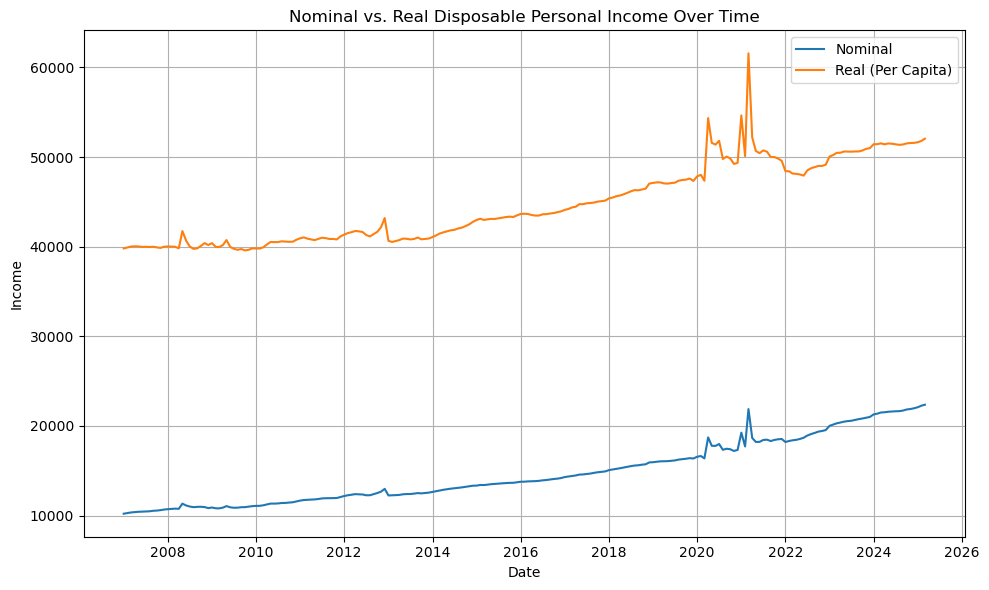

In [66]:
# compares nominal disposable income vs. real (per capita) income over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=us_econ, x='DATE', y='Disposable_Personal_Income_Nominal', label='Nominal')
sns.lineplot(data=us_econ, x='DATE', y='Disposable_Personal_Income_Per_Capita', label='Real (Per Capita)')
plt.title('Nominal vs. Real Disposable Personal Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations and Insights:**
- Two Line Plot Over Time--**2006–2025**:
  - Nominal Disposable Income--Blue: Actual dollars people received, unadjusted for inflation.
  - Real Disposable Income per Capita--Orange: Inflation-adjusted, showing purchasing power per person/capita.

- Key Observations:
  - Both income metrics rise over time, showing long-term economic growth.
  - Around 2020–2021, there is a sharp spike, especially in real per capita income
    - Most likely by a result of stimulus payments and pandemic-related income support.

- Post-pandemic--2022+, both income lines stabilize, but real income flattens more, likely reflecting inflation related constraints/pressures.
- gap widens in recent years: nominal income increases, but real income remains mostly flat — a signal that rising prices are negatively effecting or eroding purchasing power.

**Suggested Insight for Visitors or Relocators:**
- If you're considering moving to the U.S. for work or economic opportunity, this chart provides two key takeaways:
   - Earnings in dollars are steadily increasing, especially in nominal terms — so you may earn more over time.
- However, what you can buy with those dollars (real income) hasn’t increased as quickly in recent years. This suggests:
- Cost of living increases (inflation) are absorbing wage gains.
- You should factor in living costs, healthcare, housing, etc., when evaluating job offers — not just salary alone .
- Periods of support (like 2020-21) may not reflect sustainable income growth — always look at trends before and after crises.

**Bottom Line:** Income growth in the U.S. is real, however recent inflation has limited its impact on personal well-being. Evaluating real income and regional cost of living is crucial for financial planning.

